<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/Reproducir_Grafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumno Valentin Gracia
Data Science Reproducir graficos


In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mortgages_df=pd.read_csv("/content/drive/MyDrive/Coding Dojo/Semana2/mortgages.csv")
#mortgages_df.head()
mortgages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [116]:
mortgages_df.head(3)

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03


In [117]:
mortgages003_df=mortgages_df[(mortgages_df["Interest Rate"]==0.03) & (mortgages_df["Mortgage Name"]=="30 Year")]
mortgages003_df["InteresAcum"]=mortgages003_df["Interest Paid"].cumsum()

mortgages005_df=mortgages_df[(mortgages_df["Interest Rate"]==0.05) & (mortgages_df["Mortgage Name"]=="30 Year")]
mortgages005_df["InteresAcum"]=mortgages005_df["Interest Paid"].cumsum()







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [118]:
seriesChartA=mortgages003_df.groupby(["Month"])["InteresAcum"].sum()
seriesChartB=mortgages005_df.groupby(["Month"])["InteresAcum"].sum()

In [119]:
serieXChartA=list(seriesChartA.index)
serieYChartA=list(seriesChartA.values)
serieXChartB=list(seriesChartB.index)
serieYChartB=list(seriesChartB.values)


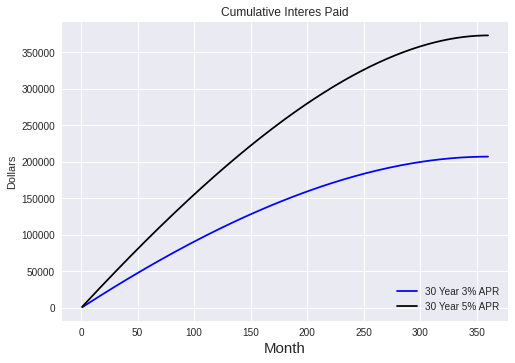

In [120]:
plt.style.use("seaborn")
plt.plot(serieXChartA,serieYChartA,marker = '', markersize = 10,c='blue',label="30 Year 3% APR")
plt.plot(serieXChartB,serieYChartB,marker = '', markersize = 10,c='black',label="30 Year 5% APR")
plt.legend(loc="lower right")


plt.xlabel("Month",fontsize="15")
plt.ylabel("Dollars")
plt.title("Cumulative Interes Paid");
